# 無重疊年份的 Features 迴歸

In [2]:
import pandas as pd
import numpy as np

In [3]:
hm_features_overlapping = pd.read_csv('../output_dataset/handmade_features_overlapping_score.csv')
hm_features_non_overlapping = pd.read_csv('../output_dataset/handmade_features_non_overlapping_score.csv')
greenwash_score = pd.read_csv('../CSR_score/common_score_ESG_all.csv', index_col=0)

In [4]:
def get_score(row, year_column):
    ticker = row['ticker']
    year = row[year_column]

    try:
        if pd.notna(year):
            year = int(year)
            score = greenwash_score.loc[ticker, str(year)]
            return score
    except:
        return None

In [5]:
# hm_features_overlapping['greenwash_score_y1'] = hm_features_overlapping.apply(lambda row: get_score(row, 'year1'), axis=1)
# hm_features_overlapping['greenwash_score_y2'] = hm_features_overlapping.apply(lambda row: get_score(row, 'year2'), axis=1)  

In [6]:
# def compute_mean(row):
#     y1, y2 = row['greenwash_score_y1'], row['greenwash_score_y2']
    
#     # 如果任一值是 NaN 或 0.0，則返回 NaN 或 0.0
#     if pd.isna(y1) or pd.isna(y2) or y1 == 0.0 or y2 == 0.0:
#         return np.nan if pd.isna(y1) or pd.isna(y2) else 0.0
    
#     return (y1 + y2) / 2  # 正常計算均值

# hm_features_overlapping['greenwash_score_mean'] = hm_features_overlapping.apply(compute_mean, axis=1)
# hm_features_overlapping.drop(columns=['greenwash_score_y1', 'greenwash_score_y2'], inplace=True)
# hm_features_overlapping.to_csv('../output_dataset/handmade_features_overlapping_score.csv', index=False)

In [7]:
# hm_features_non_overlapping['greenwash_score'] = hm_features_non_overlapping.apply(lambda row: get_score(row, 'year1'), axis=1)
# hm_features_non_overlapping.to_csv('../output_dataset/handmade_features_non_overlapping_score.csv', index=False)

In [8]:
hm_features_non_overlapping_filtered = hm_features_non_overlapping[
    hm_features_non_overlapping['greenwash_score'].notna() & 
    (hm_features_non_overlapping['greenwash_score'] != 0)
]
hm_features_non_overlapping_filtered

,folder_name,perspective_taking,length,readability_fog,readability_flesch_reading_ease,readability_smog,readability_automated_readability,sentiment_polarity,sentiment_subjectivity,comparative,...,ESGBERT/SocialBERT-social_class_0,ESGBERT/SocialBERT-social_class_1,ESGBERT/EnvironmentalBERT-water_class_0,ESGBERT/EnvironmentalBERT-water_class_1,ESGBERT/EnvironmentalBERT-biodiversity_class_0,ESGBERT/EnvironmentalBERT-biodiversity_class_1,exchange,ticker,year1,greenwash_score
3,NASDAQ_EGLE_2019,0.008621,10.462960,15.18,26.85,17.7,18.3,0.062345,0.381435,18,...,0.778236,0.221764,0.855968,0.144032,0.976347,0.023653,NASDAQ,EGLE,2019,-12.036379
4,NASDAQ_INFN_2020,0.000911,11.708846,13.45,10.03,18.9,19.6,0.127286,0.371186,29,...,0.456507,0.543493,0.961080,0.038920,0.999755,0.000245,NASDAQ,INFN,2020,-3.707492
5,NASDAQ_AMAT_2016,0.027523,10.648183,13.18,22.75,17.5,17.4,0.109356,0.340217,17,...,0.529226,0.470774,0.917641,0.082359,0.999702,0.000298,NASDAQ,AMAT,2016,-16.924727
6,NASDAQ_PRGO_2020,0.038168,10.917794,12.31,23.46,16.7,15.9,0.141645,0.385806,38,...,0.427275,0.572725,0.945684,0.054316,0.992136,0.007864,NASDAQ,PRGO,2020,-14.212503
7,NASDAQ_MSFT_2015,0.011029,12.169730,13.39,17.27,19.2,20.2,0.128524,0.374644,87,...,0.458073,0.541927,0.961139,0.038861,0.995655,0.004345,NASDAQ,MSFT,2015,-29.966602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5910,NYSE_ACM_2011,0.007407,11.281006,13.13,12.97,18.0,18.2,0.120334,0.335396,25,...,0.612779,0.387221,0.870345,0.129655,0.983666,0.016334,NYSE,ACM,2011,-8.682335
5912,NYSE_LOW_2013,0.065920,12.139083,10.14,42.00,14.6,13.3,0.169261,0.397658,208,...,0.643279,0.356721,0.876086,0.123914,0.976305,0.023695,NYSE,LOW,2013,-24.025278
5913,NYSE_CNO_2019,0.014134,10.683271,12.49,16.02,17.5,16.9,0.160021,0.348145,27,...,0.466093,0.533907,0.990686,0.009314,0.999783,0.000217,NYSE,CNO,2019,-32.085445
5914,NYSE_ABBV_2019,0.005908,11.565679,11.60,24.17,16.8,16.4,0.170862,0.412306,72,...,0.491565,0.508435,0.931923,0.068077,0.993997,0.006003,NYSE,ABBV,2019,-11.671868


R2: 0.11621678958594117
MSE: 221.21846741737752
                                            Feature   Coefficient
16         ESGBERT/EnvironmentalBERT-action_class_1 -1.183034e+06
15         ESGBERT/EnvironmentalBERT-action_class_0 -1.183032e+06
17  ESGBERT/EnvironmentalBERT-environmental_class_0 -4.264011e+05
18  ESGBERT/EnvironmentalBERT-environmental_class_1 -4.264005e+05
14         ESGBERT/EnvironmentalBERT-forest_class_1  2.403264e+05
13         ESGBERT/EnvironmentalBERT-forest_class_0  2.403263e+05
24          ESGBERT/EnvironmentalBERT-water_class_1  1.320327e+05
23          ESGBERT/EnvironmentalBERT-water_class_0  1.320319e+05
19        ESGBERT/GovernanceBERT-governance_class_0  5.397026e+04
20        ESGBERT/GovernanceBERT-governance_class_1  5.396856e+04


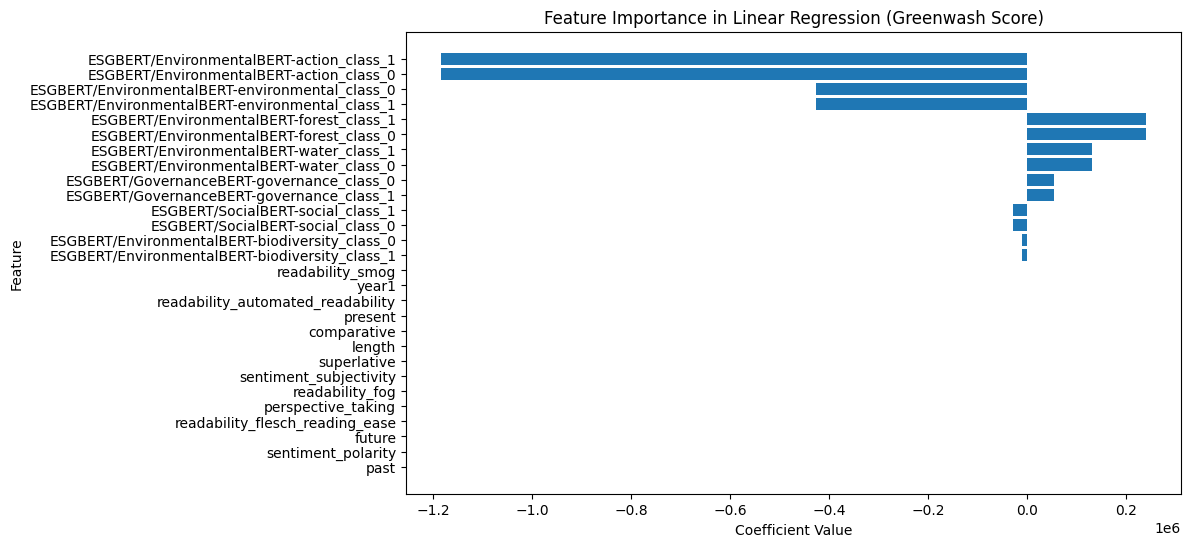

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 讀取數據
df = hm_features_non_overlapping_filtered.copy()

# 移除非數值欄位
non_numeric_cols = ['folder_name', 'exchange', 'ticker']
df_numeric = df.drop(columns=non_numeric_cols, errors='ignore')

# 確保 'greenwash_score' 存在，並移除 NaN
df_numeric = df_numeric.dropna(subset=['greenwash_score'])

# 定義 X（特徵）和 y（目標變數）
X = df_numeric.drop(columns=['greenwash_score'])
y = df_numeric['greenwash_score']

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 建立線性回歸模型
model = LinearRegression()
model.fit(X_scaled, y)

# 取得回歸係數
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_scaled)
print("R2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))


# 顯示前 10 個最重要特徵
print(feature_importance.head(10))

# 畫出特徵重要性條形圖
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression (Greenwash Score)')
plt.gca().invert_yaxis()  # 讓影響力最強的變數排在上方
plt.show()


In [10]:
hm_features_overlapping_filtered = hm_features_overlapping[
    hm_features_overlapping['greenwash_score_mean'].notna() & 
    (hm_features_overlapping['greenwash_score_mean'] != 0)
]
hm_features_overlapping_filtered

,folder_name,perspective_taking,length,readability_fog,readability_flesch_reading_ease,readability_smog,readability_automated_readability,sentiment_polarity,sentiment_subjectivity,comparative,...,ESGBERT/SocialBERT-social_class_1,ESGBERT/EnvironmentalBERT-water_class_0,ESGBERT/EnvironmentalBERT-water_class_1,ESGBERT/EnvironmentalBERT-biodiversity_class_0,ESGBERT/EnvironmentalBERT-biodiversity_class_1,exchange,ticker,year1,year2,greenwash_score_mean
0,NASDAQ_PTC_2018_2019,0.004717,10.512329,14.17,28.47,17.4,17.2,0.132992,0.378544,26,...,0.626154,0.976418,0.023582,0.999546,0.000454,NASDAQ,PTC,2018,2019,3.741212
1,NASDAQ_TRMB_2018_2020,0.006696,11.166215,13.49,20.72,17.8,18.5,0.131486,0.386574,45,...,0.451050,0.952490,0.047510,0.980519,0.019481,NASDAQ,TRMB,2018,2020,-5.594654
2,NASDAQ_JBLU_2019_2020,0.011429,11.672013,12.65,29.18,16.9,17.2,0.111325,0.394300,51,...,0.290642,0.976001,0.023999,0.993934,0.006066,NASDAQ,JBLU,2019,2020,-2.611591
3,NASDAQ_AAWW_2018_2019,0.008032,11.165281,12.93,21.53,17.5,17.8,0.126959,0.365044,37,...,0.440789,0.975139,0.024861,0.993737,0.006263,NASDAQ,AAWW,2018,2019,4.854945
4,NASDAQ_AMD_2014_2015,0.013514,12.480301,9.99,18.15,16.5,18.0,0.094548,0.378701,100,...,0.263421,0.950613,0.049387,0.999818,0.000182,NASDAQ,AMD,2014,2015,-14.358808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,NYSE_CWT_2017_2018,0.001992,11.314962,15.28,23.80,18.4,20.0,0.113846,0.370221,53,...,0.237708,0.408850,0.591150,0.963896,0.036104,NYSE,CWT,2017,2018,-22.498283
178,NYSE_ACN_2020_2021,0.003686,11.544327,12.70,20.11,17.6,17.5,0.159957,0.397346,62,...,0.639192,0.974719,0.025281,0.995416,0.004584,NYSE,ACN,2020,2021,-24.990763
179,NYSE_JBL_2018_2019,0.021951,11.457635,13.27,27.56,17.8,17.8,0.054992,0.301659,45,...,0.397233,0.887914,0.112086,0.999795,0.000205,NYSE,JBL,2018,2019,-15.095687
180,NYSE_BMI_2020_2021,0.014458,11.265643,12.02,15.41,17.4,16.9,0.109998,0.423015,28,...,0.329437,0.638954,0.361046,0.988781,0.011219,NYSE,BMI,2020,2021,-5.722273


In [11]:
# rename greenwash_score_mean to greenwash_score
hm_features_overlapping_filtered.rename(columns={'greenwash_score_mean': 'greenwash_score'}, inplace=True)
hm_features_overlapping_filtered.drop(columns=['year2'], inplace=True)

/tmp/ipykernel_2893950/4239067412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hm_features_overlapping_filtered.rename(columns={'greenwash_score_mean': 'greenwash_score'}, inplace=True)
/tmp/ipykernel_2893950/4239067412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hm_features_overlapping_filtered.drop(columns=['year2'], inplace=True)


R2: 0.11502658380455355
MSE: 217.56371754593548
                                            Feature   Coefficient
16         ESGBERT/EnvironmentalBERT-action_class_1 -1.181171e+06
15         ESGBERT/EnvironmentalBERT-action_class_0 -1.181169e+06
17  ESGBERT/EnvironmentalBERT-environmental_class_0 -2.743960e+05
18  ESGBERT/EnvironmentalBERT-environmental_class_1 -2.743955e+05
14         ESGBERT/EnvironmentalBERT-forest_class_1  2.131940e+05
13         ESGBERT/EnvironmentalBERT-forest_class_0  2.131939e+05
24          ESGBERT/EnvironmentalBERT-water_class_1  1.641497e+05
23          ESGBERT/EnvironmentalBERT-water_class_0  1.641490e+05
19        ESGBERT/GovernanceBERT-governance_class_0  6.931422e+04
20        ESGBERT/GovernanceBERT-governance_class_1  6.931255e+04


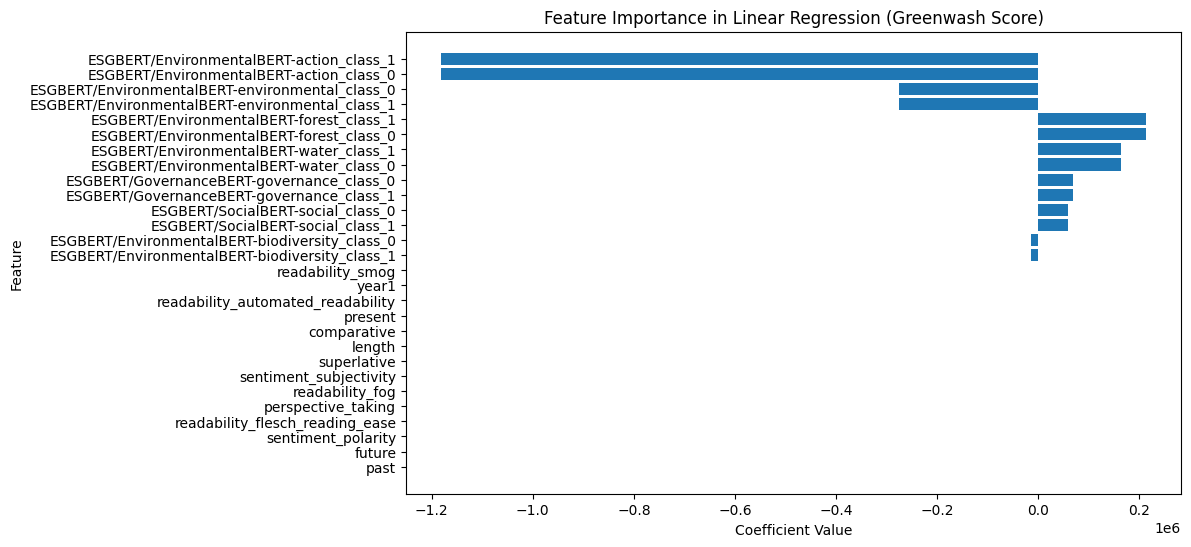

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler



# 讀取數據
df = pd.concat([hm_features_overlapping_filtered, hm_features_non_overlapping_filtered]).copy()

# 移除非數值欄位
non_numeric_cols = ['folder_name', 'exchange', 'ticker']
df_numeric = df.drop(columns=non_numeric_cols, errors='ignore')

# 確保 'greenwash_score' 存在，並移除 NaN
df_numeric = df_numeric.dropna(subset=['greenwash_score'])

# 定義 X（特徵）和 y（目標變數）
X = df_numeric.drop(columns=['greenwash_score'])
y = df_numeric['greenwash_score']

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 建立線性回歸模型
model = LinearRegression()
model.fit(X_scaled, y)

# 取得回歸係數
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_scaled)
print("R2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))


# 顯示前 10 個最重要特徵
print(feature_importance.head(10))

# 畫出特徵重要性條形圖
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression (Greenwash Score)')
plt.gca().invert_yaxis()  # 讓影響力最強的變數排在上方
plt.show()
